In [2]:
import json

import pandas as pd

df = pd.concat([
    pd.read_parquet('unverified/output/unverified-train-mixed-polarity-synthetic.parquet')
])

df.head(3)

,id,label_age,analysis_age,label_disability,analysis_disability,label_masculine,analysis_masculine,label_feminine,analysis_feminine,label_racial,analysis_racial,label_sexuality,analysis_sexuality,label_general,analysis_general,verified,synthetic,text,metadata
0,Synthetic:meta-llama:Meta-Llama-3-70B-Instruct...,True,The job posting discourages younger candidates...,False,None,False,None,False,None,False,None,False,None,True,The job posting subtly discriminates against i...,False,True,"Country: United States\n\nCompany: Davis, Gran...","{""position"": ""<GPT Will Generate>"", ""inference..."
1,Synthetic:meta-llama:Meta-Llama-3-70B-Instruct...,True,"The job posting uses the phrase ""dynamic and t...",False,None,False,None,False,None,False,None,True,"The job posting uses the phrase ""Moms and Dads...",True,"The job posting uses the phrase "" Ability to w...",False,True,Country: United States\n\nCompany: Ramos Inc\n...,"{""position"": ""triage supervisor"", ""inference_t..."
2,Synthetic:meta-llama:Meta-Llama-3-70B-Instruct...,False,None,False,None,False,None,False,None,True,"The phrase ""fit seamlessly into our office cul...",False,None,False,None,False,True,Job Title: Senior Estimator\nCompany: Nelson G...,"{""position"": ""senior estimator"", ""inference_ti..."


In [3]:
print(f"Column Names: {df.columns}")
print(f"Columns: {len(df.columns)}")
print(f"Rows: {len(df)}")

Column Names: Index(['id', 'label_age', 'analysis_age', 'label_disability',
       'analysis_disability', 'label_masculine', 'analysis_masculine',
       'label_feminine', 'analysis_feminine', 'label_racial',
       'analysis_racial', 'label_sexuality', 'analysis_sexuality',
       'label_general', 'analysis_general', 'verified', 'synthetic', 'text',
       'metadata'],
      dtype='object')
Columns: 19
Rows: 2190


In [4]:
label_columns = [col for col in df.columns if col.startswith('label_')]
analysis_columns = [col for col in df.columns if col.startswith('analysis_')]
categories = [col.replace('label_', '') for col in label_columns]
text_column = 'text'

print(f"Categories: {categories}")
print(f"Labels: {label_columns}")
print(f"Analysis: {analysis_columns}")
print(f"Input: {text_column}")

print(f"\nRows: {len(df)}")
for category in categories:
    label = f"label_{category}"
    bias = len(df[df[label] == True])
    unbiased = len(df[df[label] == False])
    print(f"\t{category}: {bias} biased, {unbiased} unbiased")

non_neutral = df[label_columns].apply(lambda x: any([i for i in x]), axis=1).sum()
neutral = df[label_columns].apply(lambda x: all([not i for i in x]), axis=1).sum()
print(f'\tHas at least one bias category: {non_neutral} ({non_neutral / len(df):.2%})')
print(f'\tHas no bias categories: {neutral} ({neutral / len(df):.2%})')


Categories: ['age', 'disability', 'masculine', 'feminine', 'racial', 'sexuality', 'general']
Labels: ['label_age', 'label_disability', 'label_masculine', 'label_feminine', 'label_racial', 'label_sexuality', 'label_general']
Analysis: ['analysis_age', 'analysis_disability', 'analysis_masculine', 'analysis_feminine', 'analysis_racial', 'analysis_sexuality', 'analysis_general']
Input: text

Rows: 2190
	age: 440 biased, 1750 unbiased
	disability: 451 biased, 1739 unbiased
	masculine: 422 biased, 1768 unbiased
	feminine: 405 biased, 1785 unbiased
	racial: 469 biased, 1721 unbiased
	sexuality: 466 biased, 1724 unbiased
	general: 517 biased, 1673 unbiased
	Has at least one bias category: 1651 (75.39%)
	Has no bias categories: 539 (24.61%)


In [5]:
metadata_columns = ['document_id', 'country', 'source', 'company', 'position']

for col in metadata_columns:
    df[col] = None

for idx, sample in df.iterrows():
    j = sample['metadata']
    md = json.loads(j)
    if sample['synthetic']:
        m = md.get('model').split(':')[-1]
        m = m.lower()
        if 'llama' in m:
            m = 'llama-3-70b'
        elif 'gpt-4o' in m:
            m = 'gpt-4o'
        df.at[idx, 'type'] = m
    else:
        df.at[idx, 'type'] = 'Real'
        for col in metadata_columns:
            df.at[idx, col] = md.get(col)

In [6]:
df.head(10)

,id,label_age,analysis_age,label_disability,analysis_disability,label_masculine,analysis_masculine,label_feminine,analysis_feminine,label_racial,...,verified,synthetic,text,metadata,document_id,country,source,company,position,type
0,Synthetic:meta-llama:Meta-Llama-3-70B-Instruct...,True,The job posting discourages younger candidates...,False,None,False,None,False,None,False,...,False,True,"Country: United States\n\nCompany: Davis, Gran...","{""position"": ""<GPT Will Generate>"", ""inference...",None,None,None,None,None,gpt-4o
1,Synthetic:meta-llama:Meta-Llama-3-70B-Instruct...,True,"The job posting uses the phrase ""dynamic and t...",False,None,False,None,False,None,False,...,False,True,Country: United States\n\nCompany: Ramos Inc\n...,"{""position"": ""triage supervisor"", ""inference_t...",None,None,None,None,None,gpt-4o
2,Synthetic:meta-llama:Meta-Llama-3-70B-Instruct...,False,None,False,None,False,None,False,None,True,...,False,True,Job Title: Senior Estimator\nCompany: Nelson G...,"{""position"": ""senior estimator"", ""inference_ti...",None,None,None,None,None,gpt-4o
3,Synthetic:meta-llama:Meta-Llama-3-70B-Instruct...,False,None,False,None,False,None,False,None,True,...,False,True,"Job Title: Engraver\nLocation: Auckland, New Z...","{""position"": ""engraver"", ""inference_time"": 14....",None,None,None,None,None,gpt-4o
4,Synthetic:meta-llama:Meta-Llama-3-70B-Instruct...,False,None,False,None,False,None,True,The job posting gives undue preference to fema...,True,...,False,True,"Country: Canada\n\nCompany: Grant, Burgess and...","{""position"": ""information clerk"", ""inference_t...",None,None,None,None,None,gpt-4o
5,Synthetic:meta-llama:Meta-Llama-3-70B-Instruct...,False,None,False,None,False,None,True,"The job posting uses feminine-coded language, ...",False,...,False,True,"Company Background:\nRwandaTech Solutions, a l...","{""position"": ""dba engineer"", ""inference_time"":...",None,None,None,None,None,gpt-4o
6,Synthetic:meta-llama:Meta-Llama-3-70B-Instruct...,True,"The phrase ""Recent graduates from university"" ...",False,None,False,None,False,None,False,...,False,True,Job Title: Digital Marketing Coordinator\n\nCo...,"{""position"": ""<GPT Will Generate>"", ""inference...",None,None,None,None,None,gpt-4o
7,Synthetic:meta-llama:Meta-Llama-3-70B-Instruct...,False,None,False,None,False,None,True,The job posting uses language that assumes the...,False,...,False,True,Job Title: Community Outreach Coordinator\nCom...,"{""position"": ""<GPT Will Generate>"", ""inference...",None,None,None,None,None,gpt-4o
8,Synthetic:meta-llama:Meta-Llama-3-70B-Instruct...,False,None,True,The job posting gives undue preference to cand...,False,None,False,None,False,...,False,True,"Kim Group, a leading technology solutions prov...","{""position"": ""field tech"", ""inference_time"": 1...",None,None,None,None,None,gpt-4o
9,Synthetic:meta-llama:Meta-Llama-3-70B-Instruct...,False,None,False,None,True,"The job posting's emphasis on a ""charismatic"" ...",False,None,False,...,False,True,Job Title: Hairstylist\nCompany: Graves and So...,"{""position"": ""hairstylist"", ""inference_time"": ...",None,None,None,None,None,gpt-4o


In [7]:
import json

documents = set()
phrases = set()
countries = set()
websites = set()
companies = set()
roles = set()
synthetics = set()
real = set()

for idx, sample in df.iterrows():
    phrases.add(sample['id'])
    if sample['synthetic']:
        synthetics.add(sample['id'])
    else:
        real.add(sample['id'])
        j = sample['metadata']
        md = json.loads(j)
        documents.add(md['document_id'])
        countries.add(md['country'])
        websites.add(md['source'])
        companies.add(md['company'])
        roles.add(md['position'])

print(f"Documents: {len(documents)}")
print(f"Phrases: {len(phrases)}")
print(f"Countries: {len(countries)}")
print(f"Websites: {len(websites)}")
print(f"Companies: {len(companies)}")
print(f"Roles: {len(roles)}")

Documents: 0
Phrases: 2190
Countries: 0
Websites: 0
Companies: 0
Roles: 0


In [8]:
import pandas as pd


def value_stats(dataframe, column, format_counts=True):
    counts = dataframe[column].value_counts()
    percentages = (dataframe[column].value_counts(normalize=True) * 100).round(2)

    dataframe = pd.DataFrame({'Count': counts, 'Percentage': percentages.astype(str) + '%'})

    if format_counts:
        dataframe['Count'] = dataframe['Count'].apply('{:,}'.format)
    return dataframe


In [9]:
df_real = df[df['synthetic'] == False]
print(f'Real samples: {len(df_real)}')

Real samples: 0


In [10]:
df_real.head(3)

,id,label_age,analysis_age,label_disability,analysis_disability,label_masculine,analysis_masculine,label_feminine,analysis_feminine,label_racial,...,verified,synthetic,text,metadata,document_id,country,source,company,position,type


In [11]:
value_stats(df_real, 'country')

,Count,Percentage
country,,


In [12]:
value_stats(df_real, 'source')

,Count,Percentage
source,,


In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import json


def plot_by_category(dataframe, x_ideal=200):
    melted_df = dataframe.melt(id_vars='type', value_vars=label_columns, var_name='categories')
    melted_df = melted_df[melted_df['value'] == 1]

    real_df = dataframe[dataframe['synthetic'] == False]
    synthetic_df = dataframe[dataframe['synthetic'] == True]
    gpt4_df = dataframe[dataframe['type'] == 'gpt-4o']
    llama3_df = dataframe[dataframe['type'] == 'llama-3-70b']

    non_neutral_real = real_df[label_columns].apply(lambda x: any([i for i in x]), axis=1).sum()
    neutral_real = real_df[label_columns].apply(lambda x: all([not i for i in x]), axis=1).sum()

    non_neutral_synthetic = synthetic_df[label_columns].apply(lambda x: any([i for i in x]), axis=1).sum()
    neutral_synthetic = synthetic_df[label_columns].apply(lambda x: all([not i for i in x]), axis=1).sum()

    gpt4o_synthetic = gpt4_df[label_columns].apply(lambda x: any([i for i in x]), axis=1).sum()
    llama3_synthetic = llama3_df[label_columns].apply(lambda x: all([not i for i in x]), axis=1).sum()

    total_real_str = '{:,.0f}'.format(len(real_df))
    total_synthetic_str = '{:,.0f}'.format(len(synthetic_df))
    total_gpt4o_str = '{:,.0f}'.format(len(gpt4_df))
    total_llama3_str = '{:,.0f}'.format(len(llama3_df))

    pivot_df = melted_df.pivot_table(index='categories', columns='type', aggfunc='size', fill_value=0)
    pivot_df.index = pivot_df.index.str.replace('label_', '')
    pivot_df = pivot_df.sort_values(by='Real', ascending=True)
    #pivot_df = pivot_df.rename(columns={True: 'Synthetic', False: 'Real'})

    plt.figure(figsize=(25, 25))
    #color=['#6495ED', '#FFA500', '#32CD32']
    bar_plot = pivot_df.plot(kind='barh', stacked=True, color=['#027eb5', '#ff9457', '#56c596'])
    
    total_values = pivot_df.sum(axis=1)

    for index, value in enumerate(total_values):
        plt.text(800, index,
                 f' {value}',
                 verticalalignment='center',
                 fontsize=16)

    #plt.title('Verified Biased Job Descriptions', fontsize=18)
    plt.xlabel('', fontsize=16)
    plt.ylabel('', fontsize=16)
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)

    plt.legend([f'{total_real_str} Real', f'{total_gpt4o_str} GPT-4o', f'{total_llama3_str} Llama3-70B'], loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=3, fontsize=16, title='')


    for rect in bar_plot.patches:
        width, height = rect.get_width(), rect.get_height()
        x, y = rect.get_xy()
        bar_plot.text(width / 2 + x, y + height / 2,
                      '{:.0f}'.format(width),
                      ha='center',
                      va='center',
                      color='000000',
                      weight='bold',
                      fontsize=18)

    # Set x limit 25% more than max value
    plt.xlim(0, 730)

    # Draw a vertical line at x = 200
    if x_ideal:
        plt.axvline(x=x_ideal, color="red", linestyle='--')

    plt.show()


def plot_neutral_vs_bias(dataframe):
    real_df = dataframe[dataframe['synthetic'] == False]
    synthetic_df = dataframe[dataframe['synthetic'] == True]
    llama_df = dataframe[dataframe['type'] == True]

    non_neutral_real = real_df[label_columns].apply(lambda x: any([i for i in x]), axis=1).sum()
    neutral_real = real_df[label_columns].apply(lambda x: all([not i for i in x]), axis=1).sum()

    non_neutral_synthetic = synthetic_df[label_columns].apply(lambda x: any([i for i in x]), axis=1).sum()
    neutral_synthetic = synthetic_df[label_columns].apply(lambda x: all([not i for i in x]), axis=1).sum()

    #print(f'non neutral synthetic: {non_neutral_synthetic}')
    #print(f'non neutral real: {non_neutral_real}')
    #print(f'neutral synthetic: {neutral_synthetic}')
    #print(f'neutral real: {neutral_real}')

    total_real_str = '{:,.0f}'.format(non_neutral_real + neutral_real)
    total_synthetic_str = '{:,.0f}'.format(non_neutral_synthetic + neutral_synthetic)
    neutral_str = '{:,.0f} Neutral'.format(neutral_synthetic + neutral_real)
    bias_cont_str = '{:,.0f} Bias'.format(non_neutral_synthetic + non_neutral_real)
    total_str = '{:,.0f}'.format(non_neutral_synthetic + neutral_synthetic + neutral_real + non_neutral_real)

    data = {'Category': [bias_cont_str, bias_cont_str, neutral_str, neutral_str],
            'Count': [non_neutral_synthetic, non_neutral_real, neutral_synthetic, neutral_real],
            'synthetic': ['Synthetic', 'Real', 'Synthetic', 'Real']}
    synth_df = pd.DataFrame(data)

    plt.figure(figsize=(20, 10))

    bar_plot = synth_df['Count'].groupby([synth_df['Category'], synth_df['type']]).sum().unstack().plot.barh(
        stacked=True, color=['#6495ED', '#FFA500', '#228B22'])

    plt.title(f'{total_str} Verified Job Descriptions', fontsize=18)
    plt.xlabel('', fontsize=16)
    plt.ylabel('', fontsize=16)
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)
    plt.legend([
        f'{total_real_str} Real',
        f'{total_synthetic_str} Synthetic'
    ],loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16, title='')

    patches = bar_plot.patches
    values = [non_neutral_real, neutral_real, non_neutral_synthetic, neutral_synthetic]

    # Display values for each segment
    for patch, value in zip(patches, values):
        width, height = patch.get_width(), patch.get_height()
        x, y = patch.get_xy()
        bar_plot.text(width / 2 + x, y + height / 2,
                      '{:,.0f}'.format(value),
                      ha='center',
                      va='center',
                      color='black',
                      fontsize=18)

    plt.show()


def plot_by_models(dataframe):
    dataframe = dataframe[dataframe['synthetic'] == True]

    models = {}

    for meta in dataframe['metadata']:
        meta = json.loads(meta)
        model_name = meta['model']
        model_name = model_name.split(':')[-1]
        if model_name not in models:
            models[model_name] = 1
        else:
            models[model_name] += 1

    dataframe = pd.DataFrame(list(models.items()), columns=['Model', 'Count'])

    #model_names = dataframe['Model']
    model_counts = dataframe['Count']

    plt.figure(figsize=(10, 5))

    bar_plot = dataframe['Count'].groupby(dataframe['Model']).sum().plot.barh(color='#6495ED')

    plt.title('Verified Synthetic Job Descriptions', fontsize=18)
    plt.xlabel('', fontsize=16)
    plt.ylabel('', fontsize=16)
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)

    patches = bar_plot.patches

    # Display values for each segment
    for patch, count in zip(patches, model_counts):
        width, height = patch.get_width(), patch.get_height()
        x, y = patch.get_xy()
        bar_plot.text(width / 2 + x, y + height / 2,
                      '{:,.0f}'.format(count),
                      ha='center',
                      va='center',
                      color='black',
                      fontsize=18)
    plt.show()

In [14]:
plot_by_category(df, None)

KeyError: 'Real'

In [15]:
plot_neutral_vs_bias(df)

KeyError: 'type'

<Figure size 1440x720 with 0 Axes>

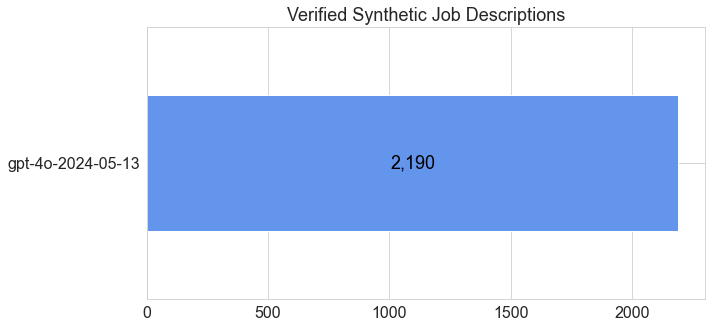

In [16]:
plot_by_models(df)

High entropy indicates that the label distribution is fairly uniform, and no single label dominates.
This suggests a balanced dataset.

The maximum entropy occurs when all labels are equally probable.
The maximum entropy can be calculated using the formula: log_2(n)

In [17]:
import numpy as np

# Calculate entropy for labels in dataset.
# Source: https://colab.research.google.com/drive/1pddMaJJIHR0O8MND42hfzYRxOPMV82KA?usp=sharing#scrollTo=RkVuiK_loty4

def categorical_entropy(df: pd.DataFrame, labels: list):
    # Calculate frequency for each label 
    label_frequency = df[labels].sum()

    # Calculate probabilities for each label
    label_probabilities = label_frequency / label_frequency.sum()

    # Calculate entropy
    entropy = -np.sum(label_probabilities * np.log2(label_probabilities))

    return entropy

In [18]:

import math

max_entropy = math.log2(len(label_columns))
print(f"Maximum Entropy Possible: {max_entropy}")

Maximum Entropy Possible: 2.807354922057604


In [19]:
# entropy for original dataset
categorical_entropy(df, label_columns)

2.8033944150575136